# Assignment #2  - Basic Image Tools

## Arik Horodniceanu PID A53285765

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.assignment2 as im
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 Image Shift

### 1

In [1]:
# this function is the same as in imagetools/assignment2.py
def shift(x, k, l, boundary='periodical'):

    xshifted = np.zeros(x.shape)
    n1,n2 = x.shape[:2] # height and width of image
    
    if ((abs(l)>n1 or abs(k)>n2) and boundary is not 'periodical'):
        print ('Error: invalid shift values. Returning black image.')
        return xshifted
    
    if boundary == 'periodical':
        # from assignment description
        irange = np.mod(np.arange(n1) + k, n1)
        jrange = np.mod(np.arange(n2) + l, n2)
        xshifted = x[irange, :][:, jrange] 
    
    elif boundary == 'extension':
        irange = np.arange(n1) + k
        jrange = np.arange(n2) + l
        irange[irange<0] = 0
        irange[irange> (n1 - 1)] = n1 - 1
        jrange[jrange<0] = 0
        jrange[jrange>(n2 - 1)] = n2 - 1
        xshifted = x[irange, :][:, jrange] 
        
    elif boundary == 'zero-padding':
        
        irange = np.arange(n1) + k
        jrange = np.arange(n2) + l
        zeroi = (irange>255) | (irange<0)
        zeroj = (jrange>255) | (jrange<0)
        
        irange = np.mod(np.arange(n1) + k, n1)
        jrange = np.mod(np.arange(n2) + l, n2)
        xshifted = x[irange, :][:, jrange] 
        xshifted[zeroi,:] = 0
        xshifted[:,zeroj] = 0
    
    #elif boundary=='mirror':

    else:
        print('Error: Undefined boundary conditions. Returning original image')
        return x
    
    return xshifted 

### 2

<IPython.core.display.Javascript object>


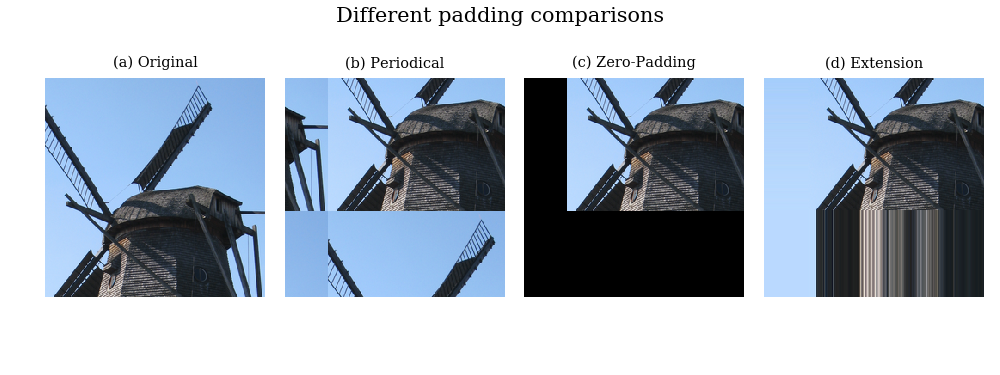

In [7]:
k = 100
l = -50

x=plt.imread('assets/windmill.png')
fig, axes = plt.subplots(ncols=4,figsize=(8, 3), sharex='all', sharey='all')
fig.suptitle('Different padding comparisons', fontsize=12)
axes[0].set_title('(a) Original')
im.show(x, ax=axes[0])


axes[1].set_title('(b) Periodical')
im.show(shift(x,k,l), ax=axes[1])
axes[2].set_title('(c) Zero-Padding')
im.show(shift(x,k,l,'zero-padding'), ax=axes[2])
axes[3].set_title('(d) Extension')
im.show(shift(x,k,l,'extension'), ax=axes[3])
fig.show()

### 3

<IPython.core.display.Javascript object>


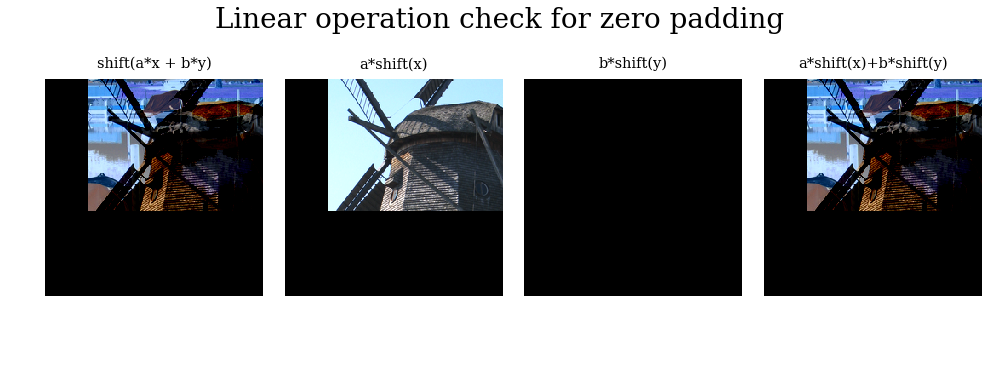

True


In [29]:
x=plt.imread('assets/windmill.png')
y=plt.imread('assets/lake.png')
k=100
l=-50
a=1.2
b=-0.9
#shift(a * x + b * y, k, l) = a * shift(x, k, l) + b * shift(y, k, l)

fig, axes = plt.subplots(ncols=4,figsize=(8, 3), sharex='all', sharey='all')
fig.suptitle('Linear operation check for zero padding', fontsize=16)
LHS = shift(a * x + b * y, k, l,'zero-padding')
im.show(LHS, ax=axes[0])
axes[0].set_title('shift(a*x + b*y)')
RHS1 = a * shift(x, k, l,'zero-padding')
RHS2 = b * shift(y, k, l,'zero-padding')
im.show(RHS1, ax=axes[1])
axes[1].set_title('a*shift(x)')
im.show(RHS2, ax=axes[2])
axes[2].set_title('b*shift(y)')
im.show(RHS1 + RHS2, ax=axes[3])
axes[3].set_title('a*shift(x)+b*shift(y)')

print(np.allclose(LHS,RHS1 + RHS2))

<IPython.core.display.Javascript object>


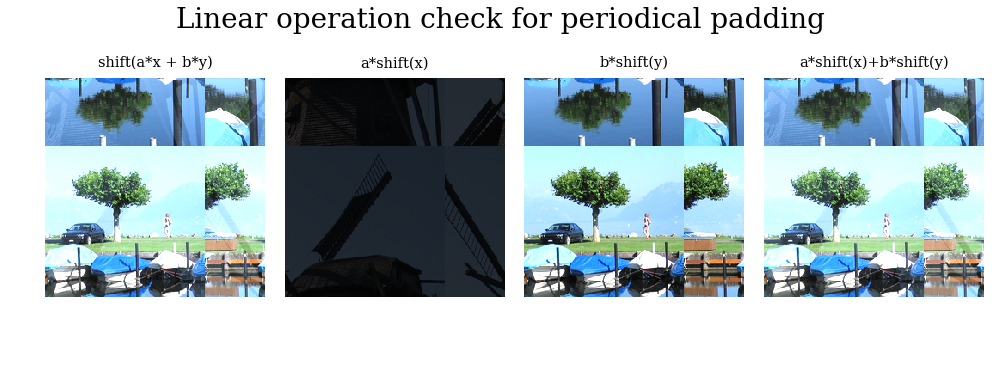

True


In [7]:
x=plt.imread('assets/windmill.png')
y=plt.imread('assets/lake.png')
k=-80
l=70
a=0.2
b=1.3
#shift(a * x + b * y, k, l) = a * shift(x, k, l) + b * shift(y, k, l)

fig, axes = plt.subplots(ncols=4,figsize=(8, 3), sharex='all', sharey='all')
fig.suptitle('Linear operation check for periodical padding', fontsize=16)
LHS = shift(a * x + b * y, k, l)
im.show(LHS, ax=axes[0])
axes[0].set_title('shift(a*x + b*y)')

RHS1 = a * shift(x, k, l)
im.show(RHS1, ax=axes[1])
axes[1].set_title('a*shift(x)')
RHS2 = b * shift(y, k, l)
im.show(RHS2, ax=axes[2])
axes[2].set_title('b*shift(y)')
im.show(RHS1 + RHS2, ax=axes[3])
axes[3].set_title('a*shift(x)+b*shift(y)')

print(np.allclose(LHS,RHS1 + RHS2))

<IPython.core.display.Javascript object>


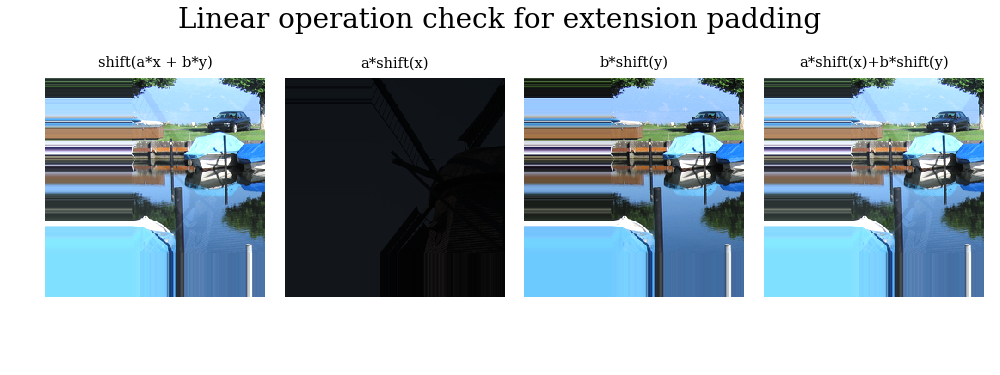

True


In [8]:
x=plt.imread('assets/windmill.png')
y=plt.imread('assets/lake.png')
k=50
l=-100
a=0.1
b=1.15
#shift(a * x + b * y, k, l) = a * shift(x, k, l) + b * shift(y, k, l)

fig, axes = plt.subplots(ncols=4,figsize=(8, 3), sharex='all', sharey='all')
fig.suptitle('Linear operation check for extension padding', fontsize=16)
LHS = shift(a * x + b * y, k, l,'extension')
im.show(LHS, ax=axes[0])
axes[0].set_title('shift(a*x + b*y)')

RHS1 = a * shift(x, k, l,'extension')
im.show(RHS1, ax=axes[1])
axes[1].set_title('a*shift(x)')
RHS2 = b * shift(y, k, l,'extension')
im.show(RHS2, ax=axes[2])
axes[2].set_title('b*shift(y)')
im.show(RHS1 + RHS2, ax=axes[3])
axes[3].set_title('a*shift(x)+b*shift(y)')

print(np.allclose(LHS,RHS1 + RHS2))

Linear operation for periodical, extension and zero-padding ie all paddings.

### 4

<IPython.core.display.Javascript object>


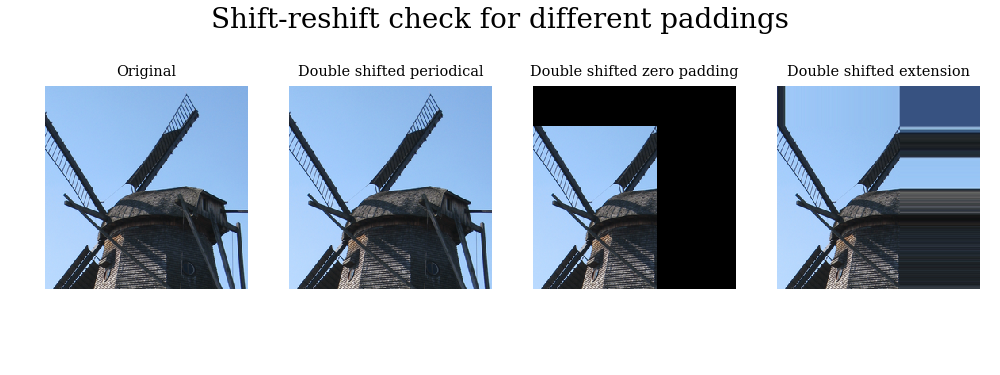

In [9]:
fig, axes = plt.subplots(ncols=4, figsize=(8, 3), sharex='all', sharey='all')
x=plt.imread('assets/windmill.png')
fig.suptitle('Shift-reshift check for different paddings', fontsize=16)
im.show(x, ax=axes[0])
axes[0].set_title('Original')

im.show(shift(shift(x,k,l), -k, -l), ax=axes[1])
axes[1].set_title('Double shifted periodical')

im.show(shift(shift(x,k,l,'zero-padding'), -k, -l,'zero-padding'), ax=axes[2])
axes[2].set_title('Double shifted zero padding')

im.show(shift(shift(x,k,l,'extension'), -k, -l,'extension'), ax=axes[3])
axes[3].set_title('Double shifted extension')
fig.show()

Periodical padding is one-to-one while zero-padding and extension are not one-to-one. 

Since periodical padding is one-to-one, by linear algebra its null space is the empty group $N(A)=\{0\}$.
The null space of zero-padding and extension is the corners(the shifted parts of the image), which are always lost in the operation.

## 2 Image Convolution

### 5

In [25]:
# this function is the same as in imagetools/assignment2.py
def kernel(name, tau=1, eps=1e-3):
    
    # l is derived from the formulas of f()
    if (name=='gaussian'):
        
        l = np.floor(np.sqrt(2*(tau**2)*(-1*np.log(eps))))
        
        ax = np.arange(-l,l+1)
        xx, yy = np.meshgrid(ax, ax, indexing='ij')
        nu = np.exp(-(xx**2 + yy**2) / 2*(tau**2))
        nu /= np.sum(nu)
        
    elif (name=='exponential'):
        
        l = np.floor(-1*tau*np.log(eps))
        ax = np.arange(-l, l +1)
        xx, yy = np.meshgrid(ax, ax, indexing='ij')

        nu = np.exp(-np.sqrt(xx**2 + yy**2) / tau**2)
        nu /= np.sum(nu)
        
    elif (name=='box'):
        
        nu = np.ones((2*tau +1,2*tau + 1))
        nu/= np.sum(nu)
        
    else:
        print('Error: Kernel not defined. Returning box kernel.')
        nu = kernel('box',tau,eps)
    
    return nu

### 6

In [21]:
# this function is the same as in imagetools/assignment2.py

def convolve_naive(x, nu):
    # x - image
    # nu - convolution kernel
    # returns the result of the convolution between x and nu
    
    n1, n2 = x.shape[:2]
    s1 = int((nu.shape[0] - 1) / 2)
    s2 = int((nu.shape[1] - 1) / 2)
    xconv = np.zeros(x.shape)
    for i in range(s1, n1-s1):
        for j in range(s2, n2-s2):
            for k in range(-s1, s1+1):
                for l in range(-s2, s2+1):
                    xconv[i][j]+=nu[s1+k][s2+l]*x[i+k][j+l]
    return xconv

### 7

In [22]:
# this function is the same as in imagetools/assignment2.py

def convolve(x, nu, boundary='periodical'):
    # x - image
    # nu - convolution kernel
    # boundary - boundary condition according to which to shift x
    # returns the result of the convolution between x and nu
    
    s1 = int((nu.shape[0] - 1) / 2)
    s2 = int((nu.shape[1] - 1) / 2)
    xconv = np.zeros(x.shape)
    
    for k in range(-s1, s1+1):
        for l in range(-s2, s2+1):
            xconv += nu[s1+k][s2+l]*shift(x,k,l,boundary)
            
    return xconv

### 8

<IPython.core.display.Javascript object>


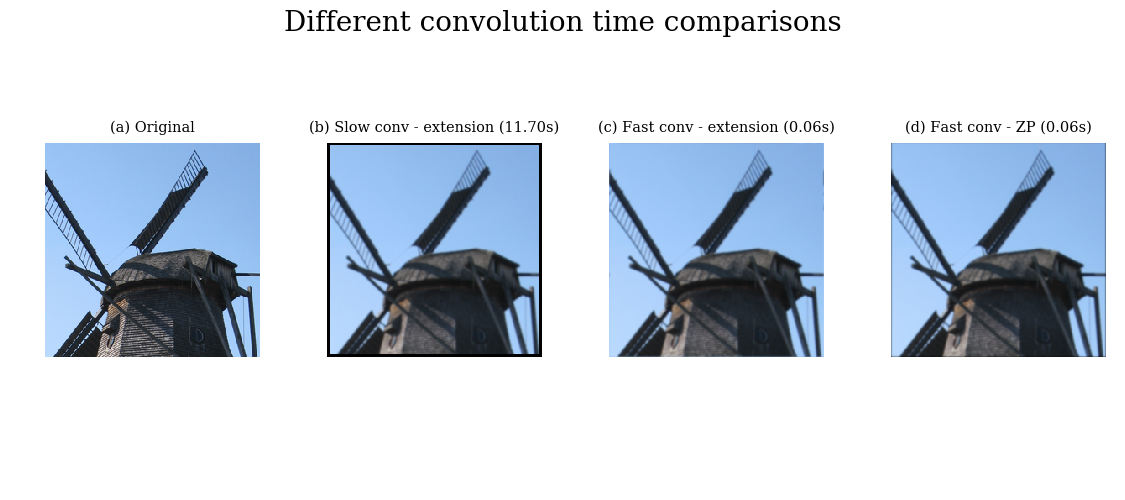

In [40]:
t1=time.time()
slow=convolve_naive(x,kernel('gaussian'))
t2=time.time()
timeSext = "{0:.2f}".format(t2-t1)

t1=time.time()
fastext=convolve(x,kernel('gaussian'))
t2=time.time()
timeFext = "{0:.2f}".format(t2-t1)

t1=time.time()
fastzp=convolve(x,kernel('gaussian'),'zero-padding')
t2=time.time()
timeFzp = "{0:.2f}".format(t2-t1)

fig, axes = plt.subplots(ncols=4,figsize=(9, 4), sharex='all', sharey='all')
fig.suptitle('Different convolution time comparisons', fontsize=16)
axes[0].set_title('(a) Original')
im.show(x, ax=axes[0])

axes[1].set_title('(b) Slow conv - extension ('+ timeSext +'s)')
im.show(slow, ax=axes[1])
axes[2].set_title('(c) Fast conv - extension ('+ timeFext +'s)')
im.show(fastext, ax=axes[2])
axes[3].set_title('(d) Fast conv - ZP (' + timeFzp +'s)')
im.show(fastzp, ax=axes[3])
fig.show()

### 9

<IPython.core.display.Javascript object>


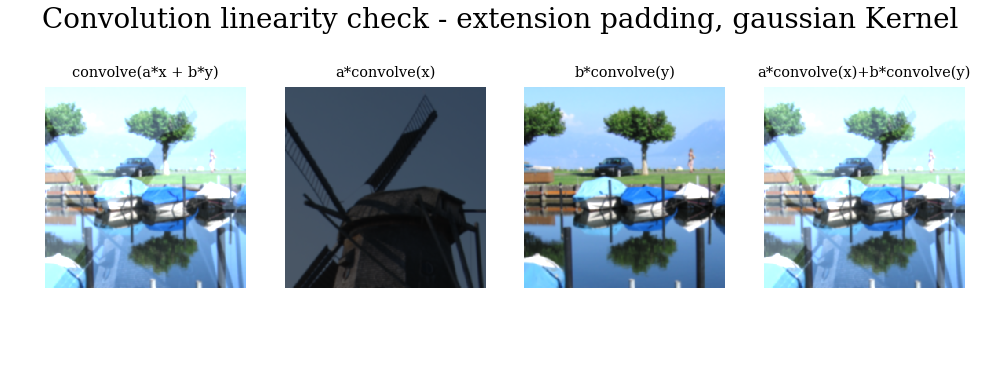

True


In [13]:
x=plt.imread('assets/windmill.png')
y=plt.imread('assets/lake.png')
k=100
l=-50
a=0.4
b=1.15
nu = kernel('gaussian')

fig, axes = plt.subplots(ncols=4,figsize=(8, 3), sharex='all', sharey='all')
fig.suptitle('Convolution linearity check - extension padding, gaussian Kernel', fontsize=16)
LHS = convolve(a * x + b * y, nu,'extension')
im.show(LHS, ax=axes[0])
axes[0].set_title('convolve(a*x + b*y)')

RHS1 = a * convolve(x, nu,'extension')
im.show(RHS1, ax=axes[1])
axes[1].set_title('a*convolve(x)')
RHS2 = b * convolve(y, nu,'extension')
im.show(RHS2, ax=axes[2])
axes[2].set_title('b*convolve(y)')
im.show(RHS1 + RHS2, ax=axes[3])
axes[3].set_title('a*convolve(x)+b*convolve(y)')

print(np.allclose(LHS,RHS1 + RHS2))

<IPython.core.display.Javascript object>


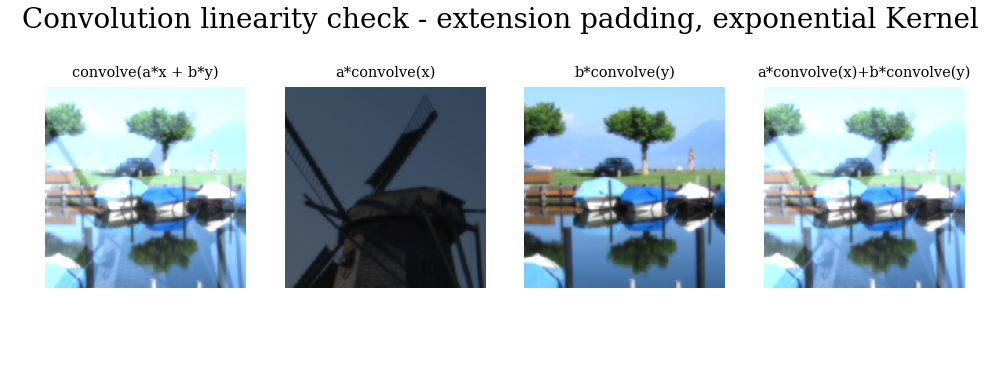

True


In [14]:
x=plt.imread('assets/windmill.png')
y=plt.imread('assets/lake.png')
k=100
l=-50
a=0.4
b=1.15
nu = kernel('exponential')

fig, axes = plt.subplots(ncols=4,figsize=(8, 3), sharex='all', sharey='all')
fig.suptitle('Convolution linearity check - extension padding, exponential Kernel', fontsize=16)
LHS = convolve(a * x + b * y, nu,'extension')
im.show(LHS, ax=axes[0])
axes[0].set_title('convolve(a*x + b*y)')

RHS1 = a * convolve(x, nu,'extension')
im.show(RHS1, ax=axes[1])
axes[1].set_title('a*convolve(x)')
RHS2 = b * convolve(y, nu,'extension')
im.show(RHS2, ax=axes[2])
axes[2].set_title('b*convolve(y)')
im.show(RHS1 + RHS2, ax=axes[3])
axes[3].set_title('a*convolve(x)+b*convolve(y)')

print(np.allclose(LHS,RHS1 + RHS2))

<IPython.core.display.Javascript object>


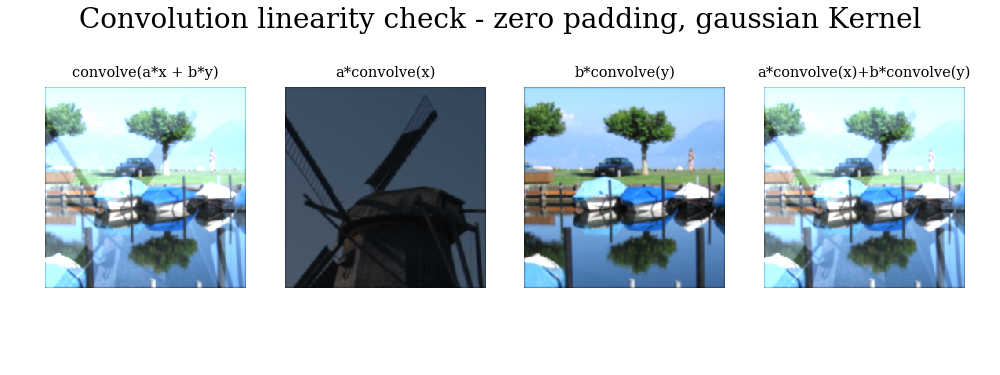

True


In [15]:
x=plt.imread('assets/windmill.png')
y=plt.imread('assets/lake.png')
k=100
l=-50
a=0.4
b=1.15
nu = kernel('gaussian')

fig, axes = plt.subplots(ncols=4,figsize=(8, 3), sharex='all', sharey='all')
fig.suptitle('Convolution linearity check - zero padding, gaussian Kernel', fontsize=16)
LHS = convolve(a * x + b * y, nu,'zero-padding')
im.show(LHS, ax=axes[0])
axes[0].set_title('convolve(a*x + b*y)')

RHS1 = a * convolve(x, nu,'zero-padding')
im.show(RHS1, ax=axes[1])
axes[1].set_title('a*convolve(x)')
RHS2 = b * convolve(y, nu,'zero-padding')
im.show(RHS2, ax=axes[2])
axes[2].set_title('b*convolve(y)')
im.show(RHS1 + RHS2, ax=axes[3])
axes[3].set_title('a*convolve(x)+b*convolve(y)')

print(np.allclose(LHS,RHS1 + RHS2))

Convolution as we know is linear, does not depend on the paddings or the kernel used.